In [1]:
# Importing all related libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error, accuracy_score, classification_report

In [2]:
# Reading The Fie
df = pd.read_csv(r'C:\Users\user\Documents\Linear Regression Assignment\day (1).csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking Data Shape
df.shape

(730, 16)

In [4]:
# Checking Null values Through Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# To Get The Statsical View of Data 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking UniqueValue to get if there's any wrong information in data or not
df.apply(lambda x: len(x.unique()))

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

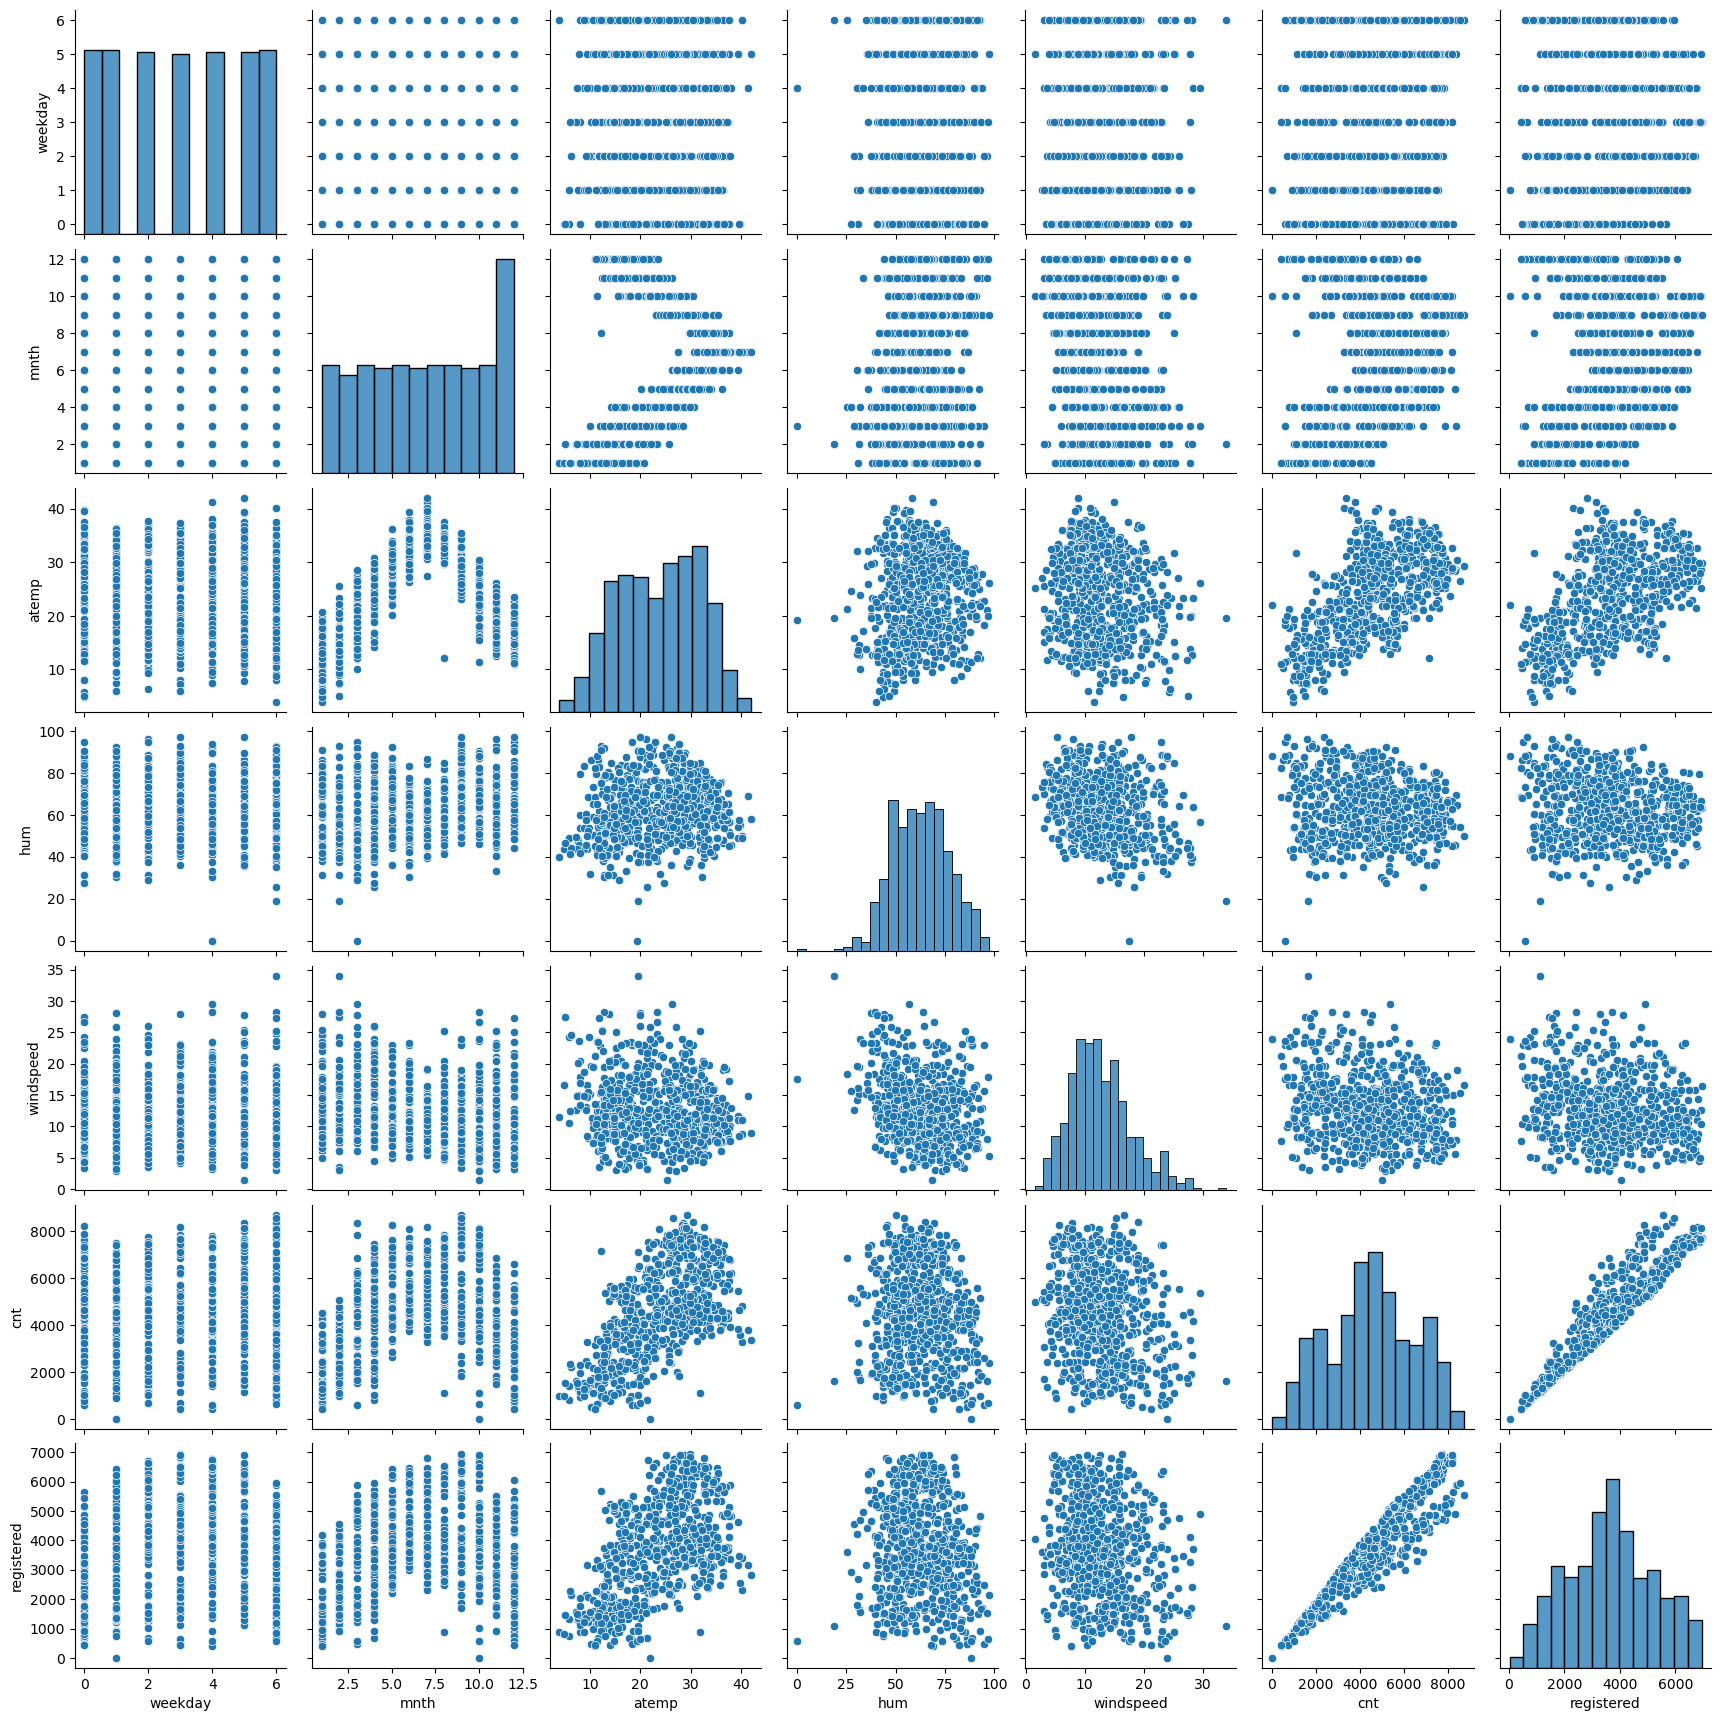

In [7]:
# Visulaising The Data
sns.pairplot(df,vars=['weekday','mnth','atemp','hum','windspeed','cnt','registered'])
plt.show

<Axes: xlabel='weathersit', ylabel='cnt'>

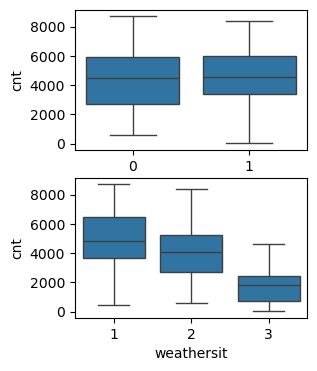

In [8]:
# Visualising Categorical Variable
plt.figure(figsize=(3,4))
plt.subplot(2,1,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

In [9]:
# finding Relations between them to drop columns
df[['temp','holiday','atemp','workingday']].corr()

,temp,holiday,atemp,workingday
temp,1.000000,-0.028764,0.991696,0.053470
holiday,-0.028764,1.000000,-0.032703,-0.252948
atemp,0.991696,-0.032703,1.000000,0.052940
workingday,0.053470,-0.252948,0.052940,1.000000


In [10]:
# Droppping highly related & irrelevent columns
df = df.drop(['temp', 'holiday','dteday','instant'], axis=1)
df.shape

(730, 12)

In [11]:
# Splitting Dataset into Train & Test
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


In [12]:
# Rescaling The Dataset
scaler = MinMaxScaler()

# Create a List of Numeric Variables
num_vars = ['mnth','weekday','weathersit','atemp','hum','windspeed','casual','registered','cnt','season']

# Fitting the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
576,0.666667,1,0.545455,0.333333,1,0.0,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.000000,1,0.181818,1.000000,0,0.5,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,0.000000,1,1.000000,0.000000,0,0.0,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,0.333333,1,0.272727,1.000000,0,0.5,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973
111,0.333333,0,0.272727,0.833333,1,0.5,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095


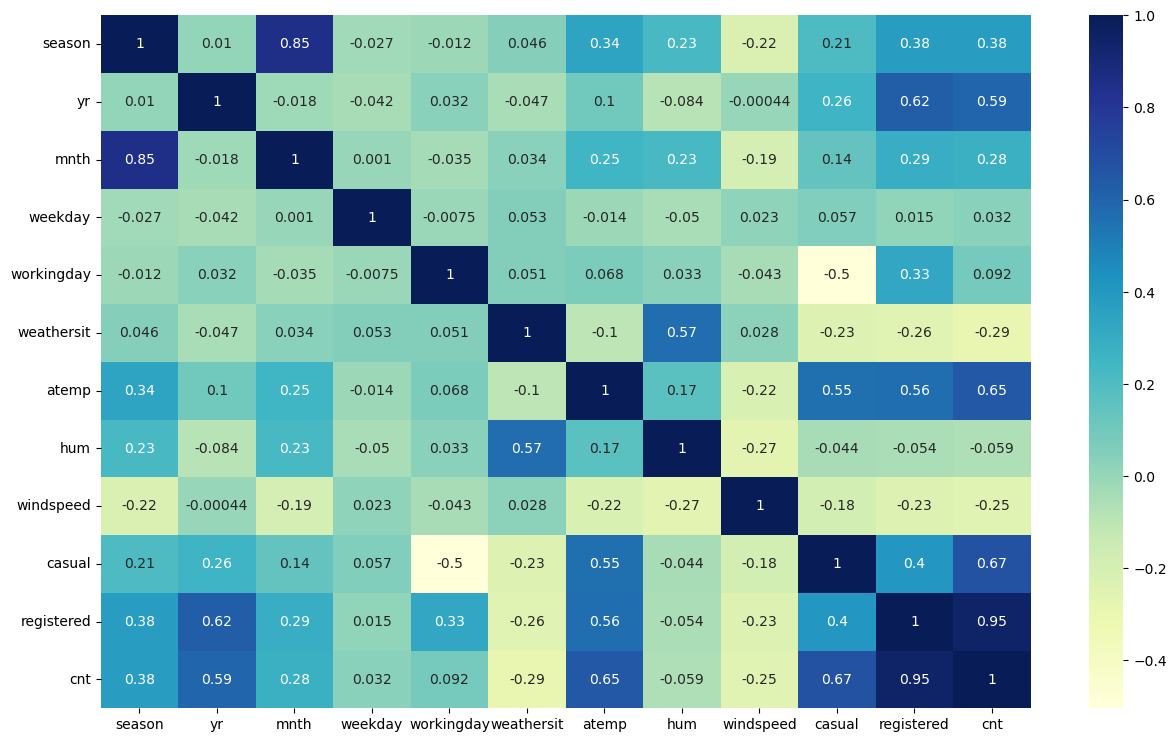

In [13]:
# Heatmap
plt.figure(figsize = (15,9))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

In [14]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [15]:
# checking input columns of training dataset
X_train.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered
576,0.666667,1,0.545455,0.333333,1,0.0,0.766351,0.725633,0.264686,0.294422,0.899220
426,0.000000,1,0.181818,1.000000,0,0.5,0.438975,0.640189,0.255342,0.290765,0.446145
728,0.000000,1,1.000000,0.000000,0,0.0,0.200348,0.498067,0.663106,0.110332,0.203869
482,0.333333,1,0.272727,1.000000,0,0.5,0.391735,0.504508,0.188475,0.340750,0.444701
111,0.333333,0,0.272727,0.833333,1,0.5,0.318819,0.751824,0.380981,0.053337,0.214554


In [16]:
# checking output columns of training dataset
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [17]:
# adding constant
X_train_sm = sm.add_constant(X_train)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.610e+30
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:57:05   Log-Likelihood:                 17258.
No. Observations:                 510   AIC:                        -3.449e+04
Df Residuals:                     498   BIC:                        -3.444e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -3.4e-16   1.61e-16     -2.109      0.035   -6.57e-16   -2.32e-17
season      6.245e-17   1.22e-16      0.512      0.609   -1.77e-16    3.02e-16
yr          1.249e-16   7.31e-17      1.710      0.088   -1.86e-17    2.68e-16
mnth         4.84e-16   1.35e-16      3.593      0.000    2.19e-16    7.49e-16
weekday     7.633e-17   6.65e-17      1.147      0.252   -5.44e-17    2.07e-16
workingday  4.163e-17   8.35e-17      0.498      0.618   -1.23e-16    2.06e-16
weathersit  4.302e-16   1.09e-16      3.949      0.000    2.16e-16    6.44e-16
atemp      -1.943e-16   1.63e-16     -1.194      0.233   -5.14e-16    1.26e-16
hum         1.804e-16   2.05e-16      0.882      0.378   -2.21e-16    5.82e-16
windspeed   4.857e-16   1.43e-16      3.396      0.001    2.05e-16    7.67e-16
casual         0.3775   2.02e-16   1.87e+15      0.000       0.377       0.377
registered     0.7968   2.43e-16   3.28e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                        9.257   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.230
Skew:                          -0.302   Prob(JB):                      0.00990
Kurtosis:                       2.735   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,registered,40.17
6,atemp,17.13
7,hum,15.85
2,mnth,13.37
0,season,12.14
4,workingday,9.60
9,casual,8.87
1,yr,5.70
8,windspeed,3.70
3,weekday,3.19


In [19]:
# Dropping high p values with high vif workingday
X = X_train.drop('workingday', axis=1)

In [20]:
# New model without workigday column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.661e+30
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:57:05   Log-Likelihood:                 16786.
No. Observations:                 510   AIC:                        -3.355e+04
Df Residuals:                     499   BIC:                        -3.350e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.978e-16      4e-16      0.495      0.621   -5.88e-16    9.83e-16
season      2.481e-16   3.06e-16      0.812      0.417   -3.52e-16    8.49e-16
yr          1.414e-16   1.73e-16      0.818      0.414   -1.98e-16    4.81e-16
mnth         4.12e-16   3.38e-16      1.219      0.223   -2.52e-16    1.08e-15
weekday     3.747e-16   1.68e-16      2.233      0.026     4.5e-17    7.04e-16
weathersit  3.886e-16   2.72e-16      1.429      0.154   -1.46e-16    9.23e-16
atemp       5.967e-16   4.07e-16      1.466      0.143   -2.03e-16     1.4e-15
hum        -1.665e-16   5.16e-16     -0.323      0.747   -1.18e-15    8.47e-16
windspeed   5.516e-16   3.61e-16      1.529      0.127   -1.57e-16    1.26e-15
casual         0.3775    3.5e-16   1.08e+15      0.000       0.377       0.377
registered     0.7968    4.8e-16   1.66e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                        8.431   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.405
Skew:                           0.287   Prob(JB):                       0.0150
Kurtosis:                       2.743   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,registered,23.02
5,atemp,16.86
6,hum,15.20
2,mnth,13.25
0,season,11.95
1,yr,4.98
8,casual,4.31
7,windspeed,3.65
3,weekday,3.18
4,weathersit,2.60


In [22]:
# Dropping high p values with high vif hum
X = X.drop('hum', axis=1)

In [23]:
# New model without hum column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.868e+31
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:57:05   Log-Likelihood:                 17485.
No. Observations:                 510   AIC:                        -3.495e+04
Df Residuals:                     500   BIC:                        -3.491e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.684e-16   6.32e-17      7.406      0.000    3.44e-16    5.93e-16
season     -6.765e-17   7.75e-17     -0.873      0.383    -2.2e-16    8.46e-17
yr          2.871e-16   4.38e-17      6.549      0.000    2.01e-16    3.73e-16
mnth        1.128e-16   8.53e-17      1.323      0.187   -5.48e-17     2.8e-16
weekday    -2.359e-16   4.24e-17     -5.562      0.000   -3.19e-16   -1.53e-16
weathersit  4.025e-16   5.75e-17      7.001      0.000     2.9e-16    5.15e-16
atemp      -2.776e-16   1.01e-16     -2.752      0.006   -4.76e-16   -7.94e-17
windspeed  -1.527e-16   8.73e-17     -1.748      0.081   -3.24e-16    1.89e-17
casual         0.3775   8.86e-17   4.26e+15      0.000       0.377       0.377
registered     0.7968   1.21e-16   6.58e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                       10.678   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.091
Skew:                          -0.358   Prob(JB):                      0.00391
Kurtosis:                       2.901   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,registered,22.19
5,atemp,15.33
2,mnth,12.43
0,season,11.79
1,yr,4.95
7,casual,4.31
6,windspeed,3.24
3,weekday,3.10
4,weathersit,1.80


In [25]:
# Dropping high p values with high vif season
X = X.drop('season', axis=1)

In [26]:
# New model without season column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.204e+31
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:57:05   Log-Likelihood:                 17651.
No. Observations:                 510   AIC:                        -3.528e+04
Df Residuals:                     501   BIC:                        -3.525e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.678e-16   4.51e-17     -8.158      0.000   -4.56e-16   -2.79e-16
yr         -1.553e-16   3.11e-17     -4.996      0.000   -2.16e-16   -9.42e-17
mnth        1.457e-16   3.53e-17      4.125      0.000    7.63e-17    2.15e-16
weekday     4.857e-17   3.05e-17      1.595      0.111   -1.13e-17    1.08e-16
weathersit -2.082e-16   4.08e-17     -5.096      0.000   -2.88e-16   -1.28e-16
atemp      -6.661e-16   7.27e-17     -9.157      0.000   -8.09e-16   -5.23e-16
windspeed   2.359e-16    6.3e-17      3.746      0.000    1.12e-16     3.6e-16
casual         0.3775   6.35e-17   5.95e+15      0.000       0.377       0.377
registered     0.7968   8.45e-17   9.43e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.474
Skew:                          -0.026   Prob(JB):                        0.479
Kurtosis:                       2.742   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,registered,21.14
4,atemp,15.30
0,yr,4.81
6,casual,4.26
1,mnth,4.18
5,windspeed,3.18
2,weekday,3.04
3,weathersit,1.76


In [28]:
# Dropping high p values low vif weekday
X = X.drop('weekday', axis=1)

In [29]:
# New model without weekday column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.241e+31
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:57:06   Log-Likelihood:                 17357.
No. Observations:                 510   AIC:                        -3.470e+04
Df Residuals:                     502   BIC:                        -3.466e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16   7.69e-17      2.346      0.019    2.93e-17    3.31e-16
yr          2.299e-16   5.48e-17      4.198      0.000    1.22e-16    3.37e-16
mnth       -5.204e-16   6.28e-17     -8.288      0.000   -6.44e-16   -3.97e-16
weathersit  5.412e-16   7.22e-17      7.497      0.000    3.99e-16    6.83e-16
atemp      -4.718e-16   1.28e-16     -3.673      0.000   -7.24e-16   -2.19e-16
windspeed   4.372e-16   1.12e-16      3.908      0.000    2.17e-16    6.57e-16
casual         0.3775   1.12e-16   3.37e+15      0.000       0.377       0.377
registered     0.7968   1.49e-16   5.34e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                       12.345   Durbin-Watson:                   1.033
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.676
Skew:                          -0.007   Prob(JB):                       0.0355
Kurtosis:                       2.440   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,registered,20.06
3,atemp,15.25
0,yr,4.67
1,mnth,4.18
5,casual,4.17
4,windspeed,2.88
2,weathersit,1.69


In [31]:
# Dropping high vif values low p registered
X = X.drop('registered', axis=1)

In [32]:
# New model without registered column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     376.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          1.82e-182
Time:                        19:57:06   Log-Likelihood:                 473.31
No. Observations:                 510   AIC:                            -932.6
Df Residuals:                     503   BIC:                            -903.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1386      0.017      8.039      0.000       0.105       0.173
yr             0.2148      0.009     24.248      0.000       0.197       0.232
mnth           0.1072      0.014      7.563      0.000       0.079       0.135
weathersit    -0.1379      0.016     -8.588      0.000      -0.170      -0.106
atemp          0.4004      0.025     16.102      0.000       0.352       0.449
windspeed     -0.1192      0.026     -4.566      0.000      -0.171      -0.068
casual         0.2844      0.026     10.791      0.000       0.233       0.336
==============================================================================
Omnibus:                       73.327   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.720
Skew:                          -0.882   Prob(JB):                     1.36e-27
Kurtosis:                       4.647   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,7.66
5,casual,4.09
1,mnth,3.45
4,windspeed,2.87
0,yr,2.11
2,weathersit,1.56


In [34]:
# Dropping high vif values low p atemp
X = X.drop('atemp', axis=1)

In [35]:
# New model without atemp column
X_train_sm = sm.add_constant(X)

# Creating First Model
lr = sm.OLS(y_train, X_train_sm)

# Fit
lr_model = lr.fit()

# getting Statstical data
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     264.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          2.14e-138
Time:                        19:57:06   Log-Likelihood:                 367.30
No. Observations:                 510   AIC:                            -722.6
Df Residuals:                     504   BIC:                            -697.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2828      0.018     15.600      0.000       0.247       0.318
yr             0.2101      0.011     19.294      0.000       0.189       0.231
mnth           0.1497      0.017      8.740      0.000       0.116       0.183
weathersit    -0.1327      0.020     -6.721      0.000      -0.172      -0.094
windspeed     -0.1637      0.032     -5.126      0.000      -0.226      -0.101
casual         0.5024      0.028     18.060      0.000       0.448       0.557
==============================================================================
Omnibus:                       27.088   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.319
Skew:                          -0.547   Prob(JB):                     2.61e-07
Kurtosis:                       3.482   Cond. No.                         9.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# calculating vif to remove multicolinearity from dataset
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,mnth,2.75
4,casual,2.55
3,windspeed,2.51
0,yr,2.10
2,weathersit,1.51


In [37]:
# Residual Analysis
y_train_pred = lr_model.predict(X_train_sm)

C:\Users\user\AppData\Local\Temp\ipykernel_10020\1330167355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

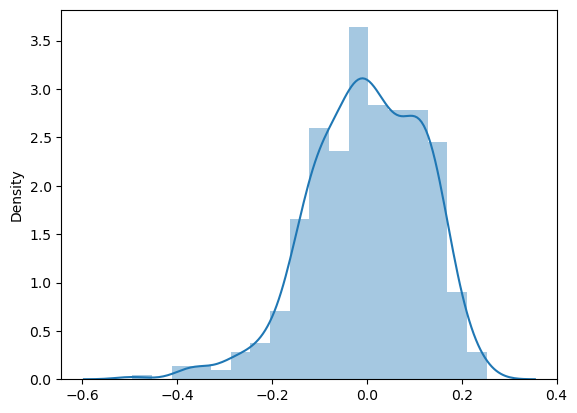

In [38]:
# distplot to check normality of errors
res = y_train -y_train_pred
sns.distplot(res)

In [39]:
num_vars = ['mnth','weekday','weathersit','atemp','hum','windspeed','casual','registered','cnt','season']

# Fitting the data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
184,0.666667,0,0.545455,0.166667,0,0.5,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706
535,0.333333,1,0.454545,0.500000,1,0.0,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034
299,1.000000,0,0.818182,0.666667,1,0.5,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382
221,0.666667,0,0.636364,0.500000,1,0.0,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400
152,0.333333,0,0.454545,0.666667,1,0.0,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029


In [40]:
df_test.describe()

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.502273,0.700000,0.186364,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154
std,0.370602,0.500809,0.311120,0.330843,0.459303,0.269102,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205
25%,0.000000,0.000000,0.272727,0.166667,0.000000,0.000000,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595
50%,0.333333,0.000000,0.454545,0.500000,1.000000,0.000000,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678
75%,0.666667,1.000000,0.727273,0.833333,1.000000,0.500000,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300


In [41]:
# dropping output column from test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [42]:
# add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered
184,1.0,0.666667,0,0.545455,0.166667,0,0.5,0.769660,0.657364,0.084219,0.933557,0.427086
535,1.0,0.333333,1,0.454545,0.500000,1,0.0,0.842587,0.610133,0.153728,0.265163,0.767976
299,1.0,1.000000,0,0.818182,0.666667,1,0.5,0.496145,0.837699,0.334206,0.072539,0.346376
221,1.0,0.666667,0,0.636364,0.500000,1,0.0,0.795343,0.437098,0.339570,0.268820,0.559630
152,1.0,0.333333,0,0.454545,0.666667,1,0.0,0.741471,0.314298,0.537414,0.223712,0.608143


In [43]:
# dropping unwanted columns from dataset
X_test_sm = X_test_sm.drop(['season','weekday','workingday','atemp','hum','registered'],axis=1)

In [44]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

184    0.753266
535    0.668964
299    0.320638
221    0.457515
152    0.375245
dtype: float64

In [45]:
# checking r2 score of test dataset
r2_score(y_true = y_test, y_pred = y_test_pred)

0.643399751304169